In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
hltv_stats = pd.read_csv('../data/hltv_playerStats-complete.csv')

In [3]:
hltv_stats.head()

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",847,22465,5361,1.45,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],378,10219,2225,1.37,1.22,8219,36.9,5994,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",829,21617,4118,1.32,1.20,16957,30.3,12839,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24


In [4]:
hltv_stats.shape

(803, 20)

In [5]:
hltv_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

In [6]:
type(hltv_stats['teams'][0])

str

In [7]:
hltv_stats.drop(columns = ['nick', 'stats_link', 'teams'], inplace = True)

In [8]:
round(hltv_stats.describe(), 2)

,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
count,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00
mean,833.17,21893.60,585.47,1.04,1.01,15142.09,45.46,14556.52,4.06,0.69,0.13,0.67,0.10,0.10,70.11,1.05
std,402.39,10607.75,1475.81,0.09,0.07,7539.73,8.42,7018.03,1.19,0.04,0.02,0.03,0.01,0.01,1.79,0.10
min,374.00,9498.00,-6238.00,0.74,0.77,5530.00,23.60,5994.00,1.40,0.52,0.08,0.53,0.04,0.06,63.30,0.70
25%,500.50,13227.00,-283.00,0.98,0.97,9092.50,40.50,8842.50,3.20,0.66,0.12,0.65,0.09,0.09,69.00,0.99
50%,734.00,19174.00,358.00,1.03,1.01,13132.00,47.30,12603.00,3.90,0.69,0.13,0.67,0.10,0.10,70.10,1.06
75%,1059.00,27881.00,1313.50,1.09,1.05,19214.00,51.45,18226.50,4.80,0.72,0.14,0.69,0.10,0.11,71.40,1.12
max,2169.00,56914.00,8864.00,1.45,1.27,40884.00,68.40,38351.00,9.10,0.86,0.18,0.75,0.14,0.16,76.30,1.45


<AxesSubplot:>

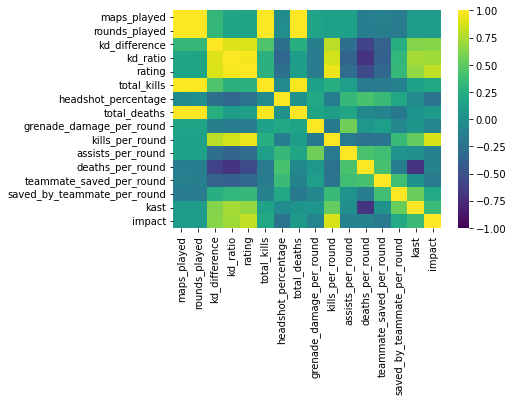

In [9]:
sns.heatmap(hltv_stats.corr(), vmin = -1, cmap = 'viridis')

-------

## Feature engineering(?)

In [10]:
hltv_stats['kills_per_map'] = hltv_stats['total_kills'] / hltv_stats['maps_played']

In [11]:
hltv_stats['kills_per_map']

0      22.270103
1      22.615535
2      20.448642
3      21.743386
4      20.454765
         ...    
798    14.985539
799    14.841758
800    14.239544
801    14.528646
802    13.487805
Name: kills_per_map, Length: 803, dtype: float64

-----------------------

## Preprocessing

In [12]:
ohe = OneHotEncoder(drop = 'if_binary', handle_unknown = 'ignore')

smart_encoder = make_column_transformer(
    (ohe, ['country']),
    remainder = 'passthrough',
    verbose_feature_names_out = False,
    n_jobs = -1
)

In [13]:
hltv_stats = pd.DataFrame(smart_encoder.fit_transform(hltv_stats).A, columns = smart_encoder.get_feature_names_out())

In [14]:
X = hltv_stats.drop(columns = 'impact')
y = hltv_stats['impact']

## Quick baseline

In [15]:
mean_squared_error(y, np.full_like(y, y.mean()), squared = False)

0.10009131869182213

-------------

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [17]:
X_train.shape

(602, 69)

In [18]:
y_train.shape

(602,)

## Basic Linear Regression

In [19]:
lrpipe = Pipeline(
    [
        #('ohe' , ohe), #moved to before splitting
        #('pf', PolynomialFeatures()),
        ('lr' , LinearRegression())
    ]
)

In [20]:
lrpipe.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [21]:
lrpipe.score(X_train, y_train), lrpipe.score(X_test, y_test)

(0.8643895493355243, 0.7941403436382358)

In [22]:
mean_squared_error(y_test, lrpipe.predict(X_test), squared = False)

0.048585392505635414

In [23]:
lrpipe.named_steps.lr.coef_

array([ 1.33577254e-03,  4.32219088e-03,  4.15132383e-03, -2.32608282e-02,
        9.64242401e-04,  1.20805264e-02,  7.59169247e-04, -4.45403702e-03,
        7.05148937e-03, -1.28683580e-02,  8.48809375e-03, -7.04518488e-03,
       -3.95629901e-03, -3.27317484e-03, -1.48167111e-02,  4.04995969e-03,
        3.42738687e-03, -3.56492255e-02, -3.25526843e-02, -6.97885877e-03,
        7.83337798e-03,  1.48668000e-02,  3.43160900e-02,  1.54390389e-15,
        3.75024508e-02, -1.20642877e-02, -1.02421243e-02,  1.52655666e-15,
        1.41915484e-03,  2.19326838e-02, -9.13218973e-03,  6.31654492e-03,
       -2.83574960e-02, -1.99832069e-02, -1.31194072e-02,  2.76408932e-02,
        8.84608977e-03,  2.97940812e-03,  9.89405533e-03,  3.25004918e-02,
       -7.81271447e-03,  3.53954366e-02, -6.00655654e-03, -1.48974443e-02,
       -8.22807128e-02,  1.91616090e-02,  8.96945341e-03,  2.86044927e-02,
       -5.20004646e-04, -2.33921986e-03, -5.56478660e-03, -8.20199813e-03,
        2.05683233e-02, -

In [121]:
rfe = RFE(LinearRegression())

In [122]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [123]:
rfe.score(X_train, y_train), rfe.score(X_test, y_test)

(0.8293925752285217, 0.7482957569804327)

-----

## Lasso and Ridge

In [72]:
lasso = Lasso(max_iter = 10_000)

In [73]:
lasGrid = GridSearchCV(lasso, {'alpha':np.linspace(0.1,5,20)})
lasGrid.fit(X_train, y_train)
lasGrid.score(X_train, y_train), lasGrid.score(X_test, y_test)

(0.6299801600607315, 0.7029430845388706)

In [74]:
ridge = Ridge(max_iter = 10_000)
ridGrid = GridSearchCV(ridge, {'alpha':np.linspace(0.1,5,20)})
ridGrid.fit(X_train, y_train)
ridGrid.score(X_train, y_train), ridGrid.score(X_test, y_test)

(0.8311444645635884, 0.8202203672068528)

In [75]:
mean_squared_error(y_test, ridGrid.predict(X_test), squared = False)

0.045403605168677995

In [87]:
ridGrid.best_estimator_

Ridge(alpha=5.0, max_iter=10000)

-------best_estimator_

## KNN

In [24]:
knnParams = {
    'knn__n_neighbors' : [3, 5, 7, 10]
}

In [25]:
knnPipe = Pipeline(
    [
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor(n_jobs = -1))
    ]
)

In [26]:
knnGrid = GridSearchCV(knnPipe, knnParams)
knnGrid.fit(X_train, y_train)
knnGrid.score(X_train, y_train), knnGrid.score(X_test, y_test)

(0.5326614212479428, 0.47560627757583074)

----

## SVR

In [27]:
svrParams = {
    'svr__kernel' : ('linear', 'poly', 'rbf'),
    'svr__C' : np.linspace(1, 20, 15),
    'svr__epsilon' : np.linspace(0.001, 0.1, 5)
    
}

In [28]:
pipe_svr = Pipeline(
    [
        ('sc', StandardScaler()),
        ('svr', SVR())
    ]
)

In [29]:
svrGrid = GridSearchCV(pipe_svr, svrParams)
svrGrid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': array([ 1.        ,  2.35714286,  3.71428571,  5.07142857,  6.42857143,
        7.78571429,  9.14285714, 10.5       , 11.85714286, 13.21428571,
       14.57142857, 15.92857143, 17.28571429, 18.64285714, 20.        ]),
                         'svr__epsilon': array([0.001  , 0.02575, 0.0505 , 0.07525, 0.1    ]),
                         'svr__kernel': ('linear', 'poly', 'rbf')})

In [30]:
svrGrid.score(X_train, y_train), svrGrid.score(X_test, y_test)

(0.8579060674976018, 0.7789327110384486)

In [31]:
svrParams2 = {
    'svr__kernel' : ('linear', 'poly', 'rbf'),
    'svr__C' : np.linspace(1, 20, 15),
    #'svr__epsilon' : np.linspace(0.001, 0.1, 5)
    
}

In [32]:
svrGrid2 = GridSearchCV(pipe_svr, svrParams2)
svrGrid2.fit(X_train, y_train)
svrGrid2.score(X_train, y_train), svrGrid2.score(X_test, y_test)

(0.7797897170194731, 0.8221184531979548)

In [33]:
svrGrid2.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('svr', SVR(C=2.357142857142857, kernel='linear'))])

In [65]:
mean_squared_error(y_test, svrGrid2.predict(X_test), squared = False)

0.04516328699960669

-----

## RandomForest

In [37]:
rf_params = {
    'n_estimators':[5, 50, 100, 200, 400, 600],
    'max_depth':[3, 5, 7, 10, 12]
}

In [38]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)

In [39]:
rfrGrid = GridSearchCV(rfr, rf_params)

In [40]:
rfrGrid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             param_grid={'max_depth': [3, 5, 7, 10, 12],
                         'n_estimators': [5, 50, 100, 200, 400, 600]})

In [41]:
rfrGrid.score(X_train, y_train), rfrGrid.score(X_test, y_test)

(0.9599463398717464, 0.8035692691497981)

In [42]:
mean_squared_error(y_test, rfrGrid.predict(X_test), squared = False)

0.04745968049021866

In [43]:
rfrGrid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=1)

In [44]:
rfrGrid.best_score_

0.7922193293871242

-----

## Decision Tree

In [45]:
dt_params = {
    'criterion':['squared_error', 'poisson', 'friedman_mse'],
    'max_depth':[3, 5, 7, 10, 12]
}

In [46]:
dt = DecisionTreeRegressor(random_state = 1)

In [47]:
dtGrid = GridSearchCV(dt, dt_params)

In [48]:
dtGrid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['squared_error', 'poisson',
                                       'friedman_mse'],
                         'max_depth': [3, 5, 7, 10, 12]})

In [49]:
dtGrid.score(X_train, y_train), dtGrid.score(X_test, y_test)

(0.8531455825760528, 0.7784260721816214)

In [50]:
mean_squared_error(y_test, dtGrid.predict(X_test), squared = False)

0.050405673512940244

In [51]:
dtGrid.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=1)

----

## Bagging Regressor

In [52]:
bagr_params = {
    'base_estimator' : [DecisionTreeRegressor(max_depth = 5, random_state = 1),
                       RandomForestRegressor(max_depth = 10, n_estimators = 50, random_state = 1)],
    'n_estimators' : [3, 5, 10, 20]
}

In [53]:
bagr = BaggingRegressor(random_state = 1, n_jobs = -1)

In [54]:
bagrGrid = GridSearchCV(bagr, bagr_params)

In [55]:
bagrGrid.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=5,
                                                                  random_state=1),
                                            RandomForestRegressor(max_depth=10,
                                                                  n_estimators=50,
                                                                  random_state=1)],
                         'n_estimators': [3, 5, 10, 20]})

In [56]:
bagrGrid.score(X_train, y_train), bagrGrid.score(X_test, y_test)

(0.9203384500209062, 0.8052485839119339)

In [57]:
mean_squared_error(y_test, bagrGrid.predict(X_test), squared = False)

0.04725637519548107

In [58]:
bagrGrid.best_estimator_

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                      n_estimators=50,
                                                      random_state=1),
                 n_estimators=20, n_jobs=-1, random_state=1)

## Adaboosting

In [59]:
adaParams = {
    'base_estimator' : [DecisionTreeRegressor(max_depth = 5, random_state = 1),
                       RandomForestRegressor(max_depth = 10, n_estimators = 50, random_state = 1)],
    'n_estimators' : [10, 25, 50, 75, 100]
}

In [60]:
adar = AdaBoostRegressor(random_state = 1)

In [61]:
adarGrid = GridSearchCV(adar, adaParams)
adarGrid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(random_state=1),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=5,
                                                                  random_state=1),
                                            RandomForestRegressor(max_depth=10,
                                                                  n_estimators=50,
                                                                  random_state=1)],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [62]:
adarGrid.score(X_train, y_train), adarGrid.score(X_test, y_test)

(0.9806345641517781, 0.8222371629284587)

In [63]:
mean_squared_error(y_test, adarGrid.predict(X_test), squared = False)

0.045148214563773686

In [64]:
adarGrid.best_estimator_

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                       n_estimators=50,
                                                       random_state=1),
                  n_estimators=75, random_state=1)

-----

## Voting Regressor

In [85]:
r1 = AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth = 10,
                                                             n_estimators = 50,
                                                             random_state = 1),
                      n_estimators = 75,
                      random_state = 1)

In [88]:
r2 = Ridge(alpha = 5.0, max_iter = 10_000)

In [91]:
r3 = Pipeline(
    [
        ('sc', StandardScaler()),
        ('svr', SVR(C = 2.357142857142857, kernel = 'linear'))
    ]
)

In [95]:
r4 = BaggingRegressor(base_estimator = RandomForestRegressor(max_depth = 10,
                                                            n_estimators = 50,
                                                            random_state = 1),
                      n_estimators = 20,
                      n_jobs = -1,
                      random_state = 1
                     )

In [99]:
voteReg = VotingRegressor(
    [
        ('ada', r1),
        ('rid', r2),
        ('svr', r3),
        #('bagr', r4)
    ]
)

In [100]:
voteReg.fit(X_train, y_train)

VotingRegressor(estimators=[('ada',
                             AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                                                    n_estimators=50,
                                                                                    random_state=1),
                                               n_estimators=75,
                                               random_state=1)),
                            ('rid', Ridge(alpha=5.0, max_iter=10000)),
                            ('svr',
                             Pipeline(steps=[('sc', StandardScaler()),
                                             ('svr',
                                              SVR(C=2.357142857142857,
                                                  kernel='linear'))]))])

In [101]:
voteReg.score(X_train, y_train), voteReg.score(X_test, y_test)

(0.9049962269920482, 0.853094767386155)

In [118]:
mean_squared_error(y_test, voteReg.predict(X_test), squared = False)

0.04104296492387098

/Users/danielsun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


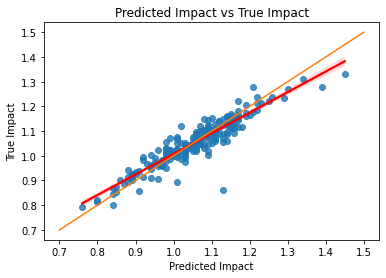

In [102]:
sns.regplot(y_test, voteReg.predict(X_test), line_kws = {'color': 'red'}).set(title = 'Predicted Impact vs True Impact',
                                                                              xlabel = 'Predicted Impact',
                                                                              ylabel = 'True Impact')
plt.plot(np.linspace(0.7, 1.5), np.linspace(0.7, 1.5))

In [114]:
voteRegWeights = {
    'weights' : [[.5, .25, .25], [.25, .5, .25], [.25, .25, .5]]
}

In [115]:
voteRegGrid = GridSearchCV(voteReg, voteRegWeights)

In [116]:
voteRegGrid.fit(X_train, y_train)

GridSearchCV(estimator=VotingRegressor(estimators=[('ada',
                                                    AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=10,
                                                                                                           n_estimators=50,
                                                                                                           random_state=1),
                                                                      n_estimators=75,
                                                                      random_state=1)),
                                                   ('rid',
                                                    Ridge(alpha=5.0,
                                                          max_iter=10000)),
                                                   ('svr',
                                                    Pipeline(steps=[('sc',
                                                           

In [117]:
voteRegGrid.score(X_train, y_train), voteRegGrid.score(X_test, y_test)

(0.9336855951796666, 0.8514072347061451)